# Mini Project: Trees and Forests

In this mini-project you'll be introduced to some fundamental concepts in machine learning: **Decision Trees**, **Random Forests**, **Boosting**, and **Bagging**. These techniques play a crucial role in building powerful and versatile machine learning models that can be applied to a wide range of tasks, from classification to regression.

## Decision Trees

Decision Trees are intuitive models that mimic human decision-making processes. Just like answering a series of questions to reach a conclusion, decision trees segment data based on a sequence of if-else questions. They partition the feature space into regions and assign a label to each region. Decision trees are particularly helpful in understanding the decision-making process behind predictions.

## Random Forests

Random Forests are an ensemble method that combines multiple decision trees to create a more robust and accurate model. Each tree in a random forest is trained on a random subset of the data with replacement (bootstrapping), and these trees are allowed to make individual predictions. The final prediction is determined through majority voting (classification) or averaging (regression) of the predictions made by the individual trees. Random Forests are known for their ability to handle noisy data, reduce overfitting, and capture complex relationships.

## Bagging: Bootstrap Aggregating

Bagging, short for Bootstrap Aggregating, is the technique behind Random Forests. It involves training multiple models on bootstrapped subsets of the training data. Bagging reduces the variance of the model by averaging out the noise and errors present in individual models. While Random Forests are a specific application of bagging to decision trees, bagging can also be applied to other base models.

## Boosting

Boosting is another ensemble technique that focuses on building a strong predictor by sequentially training multiple weak learners (often shallow decision trees). Boosting assigns weights to training instances, focusing more on those that the previous models misclassified. This iterative process helps the model correct its mistakes and improve its performance over time. Popular boosting algorithms include AdaBoost, Gradient Boosting, and XGBoost.

In this mini-project, we will:

1. Implement and visualize decision trees using the scikit-learn library.
2. Explore the power of random forests and understand feature importance.
3. Dive into the boosting technique with AdaBoost to enhance model accuracy.

For this mini-project we'll be using the [Breast Cancer Wisconsin (Diagnostic) dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html). First, let's import all the libraries we'll be using.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

Here are your tasks:

1. Use [load_breast_cancer](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) to load the Breast Cancer Wisconsin dataset as a Pandas dataframe.
2. Split the dataset into training and test sets.
3. Display the first five rows of data and make sure everything looks ok. You should have already explored the data a bit in the logistic regression mini-project so there's no need to conduct further EDA.  

In [2]:
# Load the Breast Cancer Wisconsin dataset

# sklearn.datasets.load_breast_cancer provides a convenient function for loading the data.
df = load_breast_cancer(as_frame=True).frame
print(df.columns)
# Target variable is already labeled as "target" and is the last variable in the dataset.

# Many ways to get features and target data.
x = df.drop("target", axis=1)
print(x.shape, type(x))
y = df["target"]
print(y.shape, type(y))


Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')
(569, 30) <class 'pandas.core.frame.DataFrame'>
(569,) <class 'pandas.core.series.Series'>


In [3]:
# Split the dataset into training and testing sets
# Set seed for reproducability (optional).
seed = 123
# Can also set size to determine amount of data to use in the test split. Default is 0.25 (left it at default).
x_train, x_test, y_train, y_test = train_test_split(x, y.values, random_state=seed)

In [5]:
# Display first 5 rows
# Adjust the number of columns displayed.
pd.set_option("display.max_columns", None)
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  radius error  texture error  perimeter error  \
0                

Let's start by diving into decision trees. At a high level, decision trees are a machine learning algorithm used for both classification and regression tasks. They model decisions and decision-making processes by breaking down a complex decision into a sequence of simpler decisions or questions. Each decision leads to one of several possible outcomes, eventually leading to a prediction or classification.

**Decision trees are built out of the following components:**
- **Nodes:** Decision trees consist of nodes. The initial node is the root node, and the final nodes are called leaf nodes.
- **Edges:** Edges connect nodes and represent the decision outcomes.
- **Attributes/Features:** Each node involves a decision based on a specific attribute or feature.
- **Splitting:** At each node, the dataset is partitioned into subsets based on an attribute's values.
- **Leaf Nodes:** These nodes represent the final predicted class or value.

**How Decision Trees Work:**
1. **Selecting the Best Feature:** Decision trees start with the root node and select the feature that best separates the data.
2. **Splitting:** The selected feature is used to split the data into subsets at each internal node.
3. **Repeating:** The process continues recursively for each subset, selecting the best feature at each node.
4. **Leaf Nodes:** The process stops when a certain stopping criterion is met, or when all instances at a node belong to the same class.

**Advantages:**
1. **Interpretability:** Decision trees are easy to understand and interpret. The path from the root to a leaf node can be visualized as a sequence of decisions.
2. **Handles Numerical and Categorical Data:** Decision trees can handle both numerical and categorical data, making them versatile.
3. **Non-Linearity:** They can capture non-linear relationships between features and the target variable.
4. **Feature Importance:** Decision trees provide a measure of feature importance, helping in feature selection.

**Challenges and Considerations:**
1. **Overfitting:** Decision trees can create overly complex models that fit the training data too closely, leading to poor generalization.
2. **Instability:** Small changes in the data can lead to different trees, which can make the model unstable.
3. **Bias towards Majority Class:** In classification tasks, decision trees tend to favor the majority class if classes are imbalanced.

**Improvements:**
1. **Pruning:** Pruning is the process of removing branches that do not improve the model's performance on validation data, reducing overfitting.
2. **Ensemble Methods:** Random Forests and Gradient Boosting Trees are ensemble methods that combine multiple decision trees to improve performance.

There are a number of different metrics used to determine how to split a node in a decision tree. The Gini impurity is a popular criterion used in decision tree algorithms. It measures the degree of impurity in a dataset, where lower values indicate more pure subsets of data. In the context of decision trees, the Gini impurity is used to assess how often a randomly chosen element would be misclassified if it were randomly assigned to a class based on the distribution of class labels in a subset. The Gini impurity ranges between 0 (pure node, all instances belong to a single class) and 0.5 (impure node, instances are evenly distributed across classes).

Here are your tasks:

1. Use Scikit-Learn's [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) to fit a model on the training data.
2. Visualize the resulting tree using [plot_tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html).
3. Iterate on the first two steps by trying different inputs to the decision tree classifier. What happens if you change the max depth? How about the maximum number of lead nodes? From the visualization, make sure you're able to understand how to descend the decision tree to arrive at a prediction.

In [6]:
# Create a Decision Tree model
# Set seed for reproducability (optional).
seed=123
model = DecisionTreeClassifier(random_state=seed)

# Fit a model on the training data.
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=123)

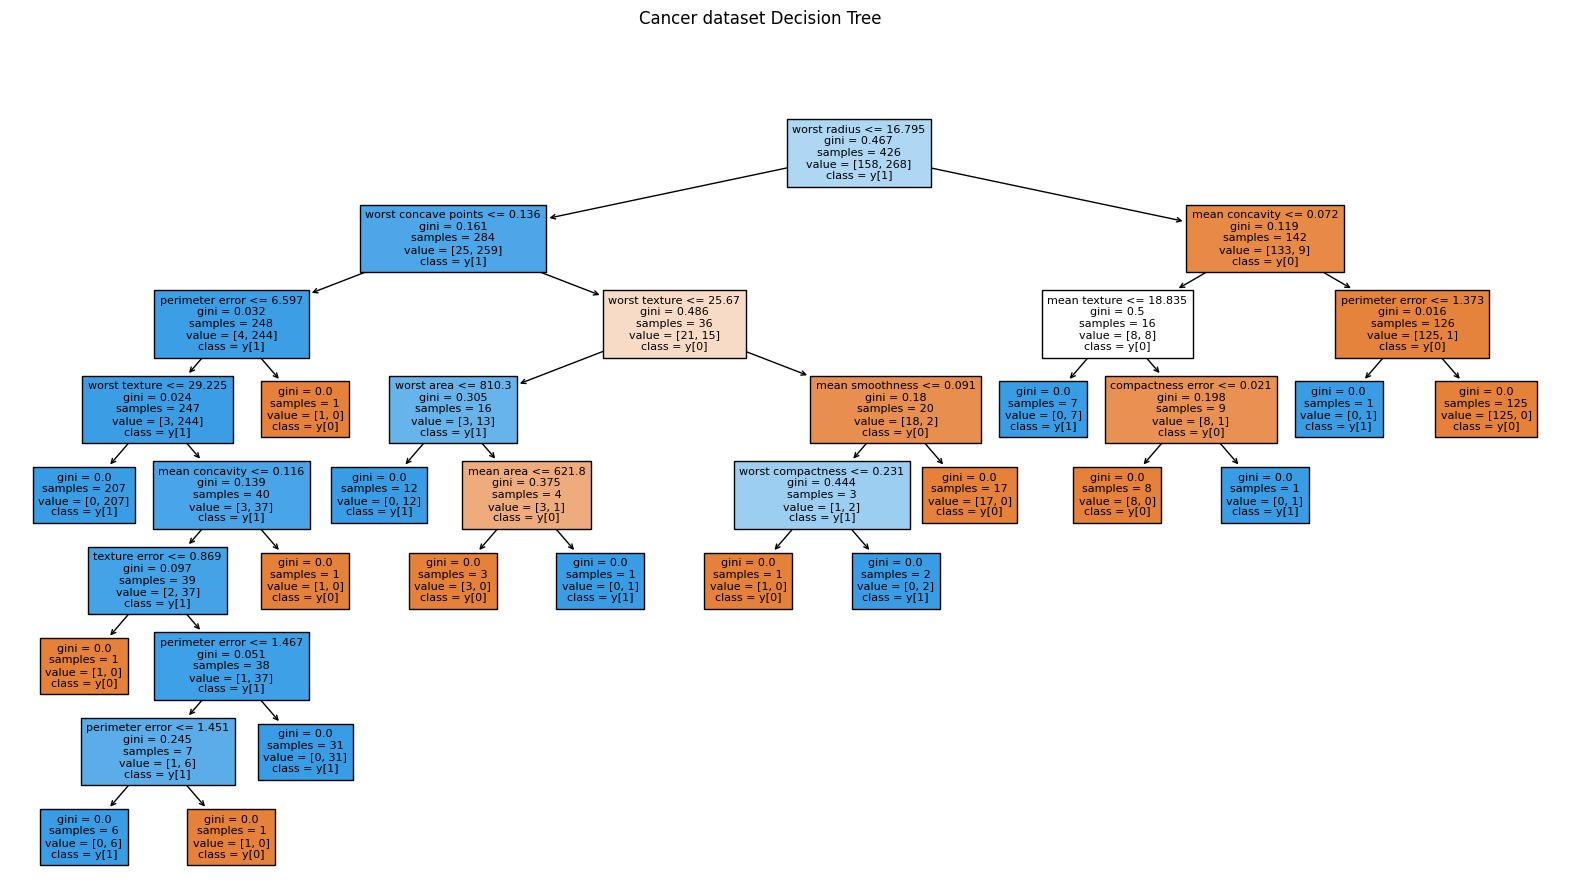

In [7]:
# Visualize the Decision Tree

# Use plot_tree to plot.
plt.figure(figsize=(20,10))
plt.suptitle("Cancer dataset Decision Tree")
plot_tree(model, feature_names=x_train.columns, class_names=True, filled = True, fontsize=8)
plt.show()

8
1.0
4
0.9882629107981221


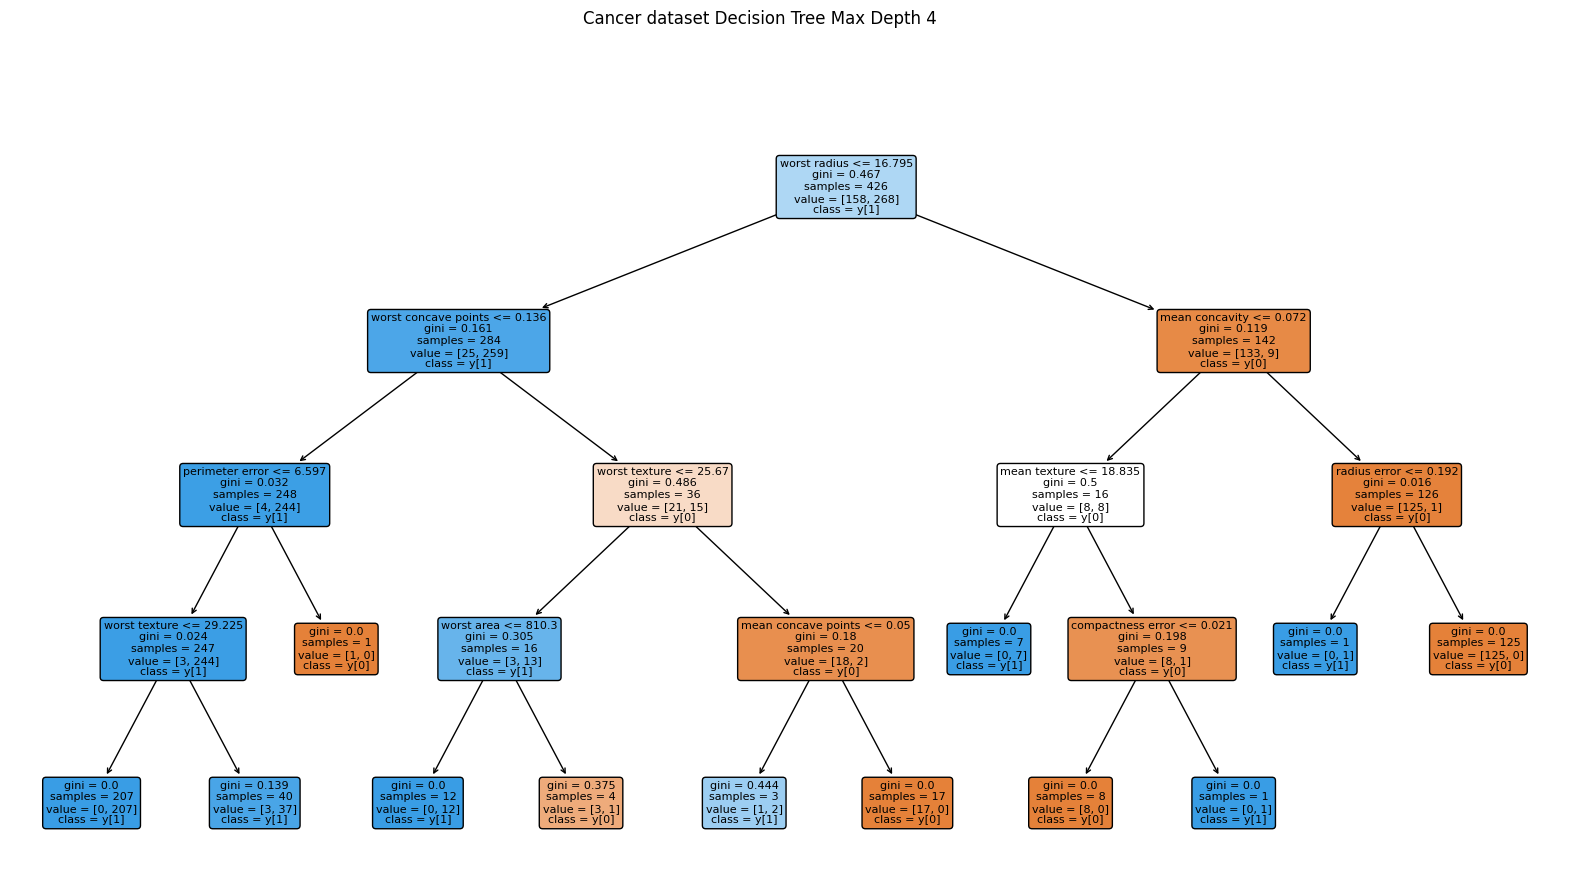

In [8]:
# Iterate on the first two steps by trying different inputs to the decision tree classifier. What happens if you change the max depth?

# Check the current depth and score
print(model.get_depth())
print(model.score(x_train, y_train))

# Create new model with max depth = 4.
second_model = DecisionTreeClassifier(max_depth=4, random_state=seed)
# Fit a model on the training data.
second_model.fit(x_train, y_train)


# Check the depth and score
print(second_model.get_depth())
print(second_model.score(x_train, y_train))

# Use plot_tree to plot.
plt.figure(figsize=(20, 10))
plt.suptitle("Cancer dataset Decision Tree Max Depth 4")
plot_tree(second_model, feature_names=x_train.columns, filled=True, class_names=True, fontsize=8, rounded=True)
plt.show()


3. Iterate on the first two steps by trying different inputs to the decision tree classifier. What happens if you change the max depth?
If you increase max depth, the score is not improved. If you decrease max depth (set equal to 4) then the score starts to decrease. Also, the leaf nodes are less pure in the tree. In the original decision tree all of the leaves have gini = 0.0. With a max depth = 4, only 4 out of 8 do. The leaf nodes overall are less pure are harder to interpet. In addition, the value numbers are emuch higher with max depth = 4, whihc makes sense given the complexity of the model is being simplified.

18
1.0
6
1.0


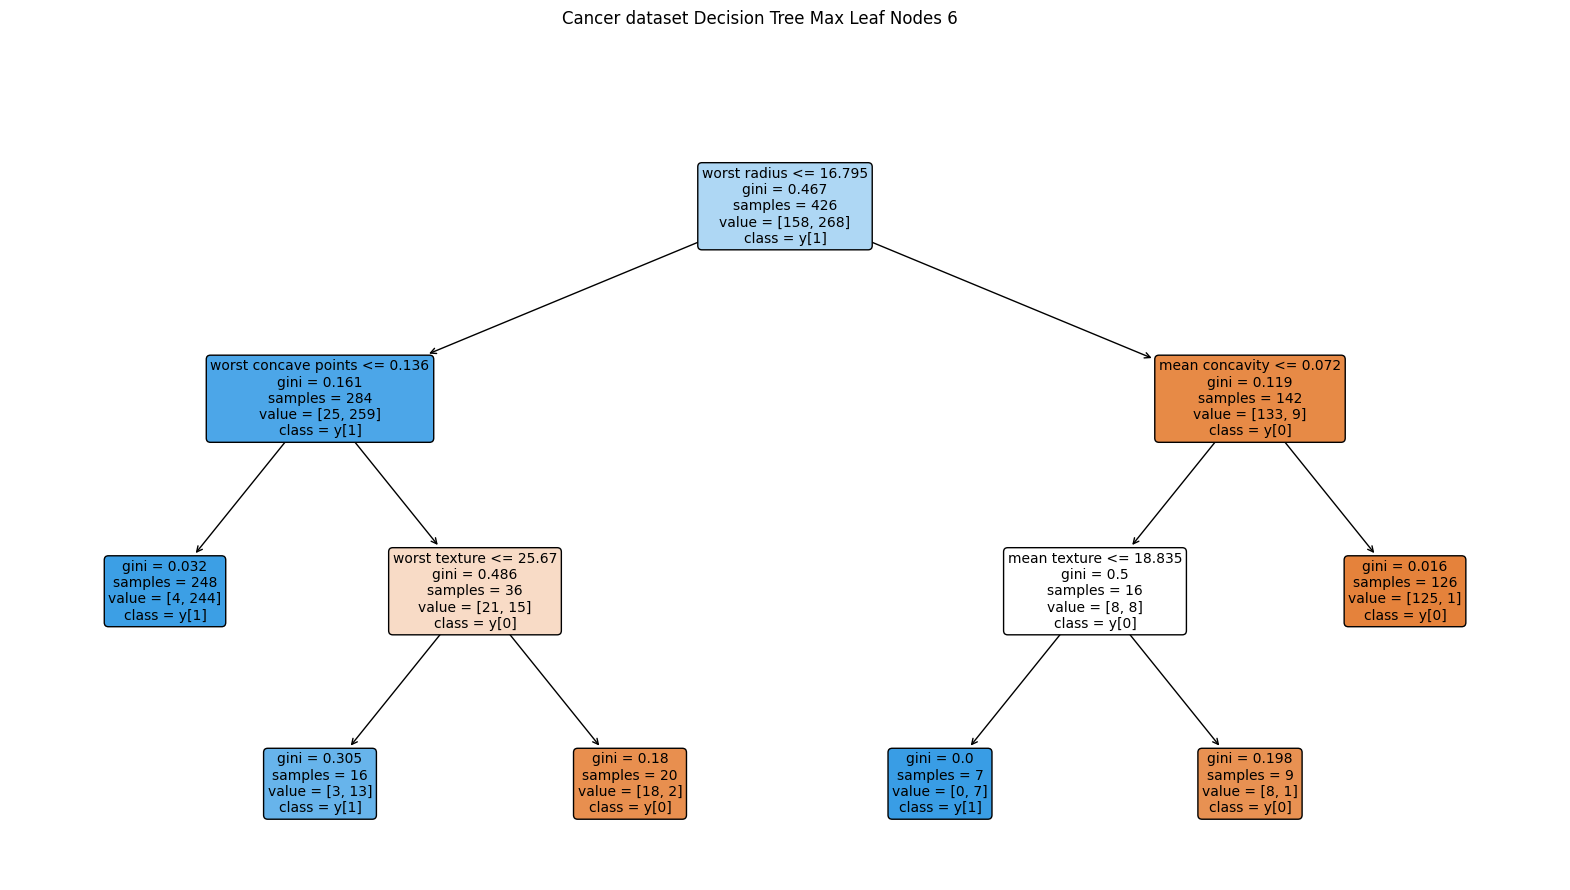

In [9]:
# Iterate on the first two steps by trying different inputs to the decision tree classifier. How about the maximum number of leaf nodes?

# By default max number of leaf nodes is unlimited. Get the number of leaf nodes from the initial model, and get the score.
print(model.get_n_leaves())
print(model.score(x_train, y_train))

# Create new model with max number of leaf nodes = 6.
third_model = DecisionTreeClassifier(max_leaf_nodes=6, random_state=seed)

# Fit a model on the training data.
third_model.fit(x_train, y_train)

# Get the number of leaf nodes from the initial model, and get the score.
print(third_model.get_n_leaves())
print(model.score(x_train, y_train))

# Use plot_tree to plot.
plt.figure(figsize=(20, 10))
plt.suptitle("Cancer dataset Decision Tree Max Leaf Nodes 6")
plot_tree(third_model, feature_names=x_train.columns, filled=True, class_names=True, fontsize=10, rounded=True)
plt.show()

3. How about the maximum number of leaf nodes?
The model score does not change whether you increase or decrease the maximum number of leaf nodes. However, the leaf nodes are less pure overall, and 4 out of 6 leaf nodes have a non-zeo gini. This leads to a model that it is hard to interpret. Also, the number of samples in the leaf nodes icnreases when the maximum number of lead nodes is decreased.

3. ......From the visualization, make sure you're able to understand how to descend the decision tree to arrive at a prediction.
Example using the baseline Cancer Dataset Decision Tree:
Evaluate whether worst redius is less than 16.975
If not, evaluate whether mean concavity is less than or equal to 0.072.
If not, evaluate whether perimeter error is less than or equal to 1.373.
If not, you arrive at your predicted y value.

Random Forests are an extension of decision trees that leverage the power of ensemble learning to improve predictive accuracy and robustness. Instead of relying on a single decision tree, Random Forests combine multiple decision trees to make more accurate and stable predictions. Let's walk through the steps of going from decision trees to Random Forests:

**Step 1: Building Individual Decision Trees**
1. **Decision Tree Construction:** Start by building multiple individual decision trees. Each tree is trained on a bootstrapped subset of the training data, meaning that each tree sees a slightly different version of the data due to random sampling with replacement.
2. **Feature Selection:** At each node of a decision tree, only a random subset of features is considered for splitting. This introduces randomness and diversity among the trees.

**Step 2: Combining Trees in a Random Forest**
1. **Predictions:** When you need to make a prediction using the Random Forest, each individual tree in the forest makes a prediction.
2. **Majority Voting (Classification) or Averaging (Regression):** In the case of classification, the class that the majority of trees predict becomes the final prediction. In the case of regression, the average of predictions from all trees is taken as the final prediction.

**Benefits of Random Forests:**
1. **Reduced Overfitting:** The ensemble nature of Random Forests helps reduce overfitting. The diversity among the trees reduces the risk of capturing noise in the data.
2. **Feature Importance:** Random Forests can provide an estimate of feature importance by tracking how much each feature contributes to improving the purity of the nodes.
3. **Handles Noisy Data:** Random Forests can handle noisy and irrelevant features more effectively than individual decision trees.
4. **Parallelization:** Training decision trees can be parallelized since they are independent of each other, which speeds up the training process.

Here are your tasks:

1. Use your training data to train a Random Forest using [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).
2. Extract the feature importances from the trained model.
3. Print the feature importances from largest to smallest.

In [11]:
# Train random forest model
# Create a model from the RandomForestClassifier, and include the seed for reproducability.
rf_model = RandomForestClassifier(random_state=seed)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=123)

In [12]:
# Extract feature importances
print(rf_model.get_params())
# Accuracy score for Random Forest model.
y_test_predicted2 = rf_model.predict(x_test)
print(accuracy_score(y_test, y_test_predicted2))

feature_importances = rf_model.feature_importances_


{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False}
0.993006993006993


In [13]:
# Print feature importance
# Zip the features names and importances together for display purposes.
zipped_list = list(zip(x_train.columns, feature_importances))
# Sort the zipped list.
sorted_feature_importances = sorted(zipped_list, key=lambda x: x[1], reverse=True)

# Print a blank line then print the feaure names and importances.
print()
for item in enumerate(sorted_feature_importances):
  print(item[1][0], "    ", item[1][1], "\n")


worst perimeter      0.12771779843833064 

worst radius      0.12602720130232506 

worst concave points      0.11502870797351597 

worst area      0.10760393847344424 

mean concave points      0.1048833006618359 

mean concavity      0.04900193938699164 

mean area      0.04570653762304396 

area error      0.04338276053477062 

mean perimeter      0.03611316583906619 

mean radius      0.03589716584176398 

worst concavity      0.03158353133959137 

worst texture      0.0270573847461236 

mean texture      0.016941111794077576 

worst compactness      0.014304679628449663 

perimeter error      0.012358357129216596 

worst smoothness      0.01226243163332931 

worst symmetry      0.011855117309310565 

mean compactness      0.010486876405177632 

radius error      0.009825218711388235 

worst fractal dimension      0.00766262069904036 

concavity error      0.007081378497144278 

smoothness error      0.006290201683166159 

compactness error      0.006229843839189979 

mean smoothne

AdaBoost, short for Adaptive Boosting, is a powerful ensemble learning technique used primarily for classification tasks. It is designed to enhance the performance of weak learners (typically shallow decision trees) by combining their predictions. AdaBoost focuses on learning from the mistakes of previous models and gives more weight to misclassified instances, allowing subsequent models to correct those mistakes.

Here's an overview of how AdaBoost works:

**Step 1: Building Weak Learners (Base Models)**
1. **Initialization:** Each training instance is initially assigned equal weights.
2. **Training Weak Learners:** A series of weak learners (e.g., shallow decision trees) are trained on the data. Each weak learner tries to minimize the weighted classification error, where the weight of an instance depends on its previous misclassifications. The first weak learner is trained on the original data.

**Step 2: Weighting Instances**
1. **Calculating Error:** The weighted classification error of each weak learner is computed as the sum of weights of misclassified instances.
2. **Updating Weights:** Instances that were misclassified by the previous weak learner are given higher weights, making them more important for subsequent models. Instances that were correctly classified are given lower weights.

**Step 3: Combining Weak Learners**
1. **Predictions and Voting:** The predictions from all weak learners are combined using weighted majority voting. Weights are assigned to each weak learner based on its performance (lower error leads to higher weight).
2. **Final Prediction:** The final prediction is made by taking a weighted majority vote of the weak learners' predictions.

**Benefits of AdaBoost:**
1. **Adaptive Learning:** AdaBoost focuses on instances that were misclassified by previous models, adapting to the complexity of the data.
2. **Improves Weak Models:** Even if individual weak learners perform only slightly better than random guessing, AdaBoost can combine them to create a strong model.
3. **Reduces Overfitting:** The iterative nature of AdaBoost allows it to focus on hard-to-classify instances and improve overall generalization.

Here are your tasks:

1. Build and train an [AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) on your training data using a decision tree of max depth equal to 1 as your weak learner.
2. Evaluate your decision tree, random forest, and AdaBoost models by applying [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) to the test data. Which model performs the best? Experiment by changing the hyperparameters of these models.


In [14]:
# Build and train an AdaBoostClassifier on your training data.
# Create AdaBoostClassifier and include seed for reproducability.
# Default value for estimator is None, which means the base estimator is a DecisionTreeClassifier with max_depth=1.
adb_model = AdaBoostClassifier(random_state = seed)
adb_model.fit(x_train, y_train)

AdaBoostClassifier(random_state=123)

1. Build and train an AdaBoostClassifier on your training data using a decision tree of max depth equal to 1 as your weak learner.
Default value for estimator is None, which means the base estimator is a DecisionTreeClassifier with max_depth=1.

In [15]:
# Evaluate models

# Apply accuracy score to the test data for each of the models.

# Accuracy scoree for decision tree model.
y_test_predicted = model.predict(x_test)
print(accuracy_score(y_test, y_test_predicted))

# Accuracy scoree for the random forest model.
y_test_predicted = rf_model.predict(x_test)
print(accuracy_score(y_test, y_test_predicted))

# Accuracy score for AdaBoostClassifier model.
y_test_predicted = adb_model.predict(x_test)
print(accuracy_score(y_test, y_test_predicted))

0.965034965034965
0.993006993006993
0.972027972027972


2. Evaluate your decision tree, random forest, and AdaBoost models by applying accuracy_score to the test data. Which model performs the best?
The random forest model is performing better than the decision tree model and better than the AdaBoost enabled model.

In [16]:
# Experiment by changing the hyperparameters of these models.


# Decision Tree adjustments.
# Get parameters for existing Decision Tree model.
print(model.get_params())
print("Tree depth:", model.get_depth())
print("Number of leaf nodes", model.get_n_leaves())
# Accuracy score for DecisionTree model.
y_test_predicted = model.predict(x_test)
print(accuracy_score(y_test, y_test_predicted))

#Adjust Decision Tree model.

# Adjust the max leaf nodes.
model2 = DecisionTreeClassifier(max_leaf_nodes=6, random_state=seed)
# Adjusted the decision criterion. Entropy and log loss each was better than original model (gini) but not as good as other adjustments and did not increas accuracy score when combined with opther adjsutments.
model3 = DecisionTreeClassifier(criterion="log_loss", random_state=seed)
# Adjust the max depth.
model4 = DecisionTreeClassifier(max_depth=3, random_state=seed)
# Fit model on the training data.
model2.fit(x_train, y_train)
model3.fit(x_train, y_train)
model4.fit(x_train, y_train)
# Accuracy score for decision tree model.
y_test_predicted = model2.predict(x_test)
print(accuracy_score(y_test, y_test_predicted))
y_test_predicted = model3.predict(x_test)
print(accuracy_score(y_test, y_test_predicted))
y_test_predicted = model4.predict(x_test)
print(accuracy_score(y_test, y_test_predicted))


{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 123, 'splitter': 'best'}
Tree depth: 8
Number of leaf nodes 18
0.965034965034965
0.9790209790209791
0.972027972027972
0.9790209790209791


For Decision Tree, experimented with setting the max number of leaf nodes (6) and the max depth (3) similar to values previously identified when working with the decision tree (see Decision Tree section of the project). Each of these changes increased the accuracy score to the same number (0.979...) but combined they could not take the accuracy score higher. The accuracy with improvements is still lower than what is accomplished with the Random Forest model. Different criterion values were tried (entropy, log_loss) but these did not change the accuracy score.

In [17]:
# Random Forest enabled model adjustments.

# Get the Random Forest enabled model parameters.
print(rf_model.get_params())
# Accuracy score for Random Forest model.
y_test_predicted2 = rf_model.predict(x_test)
print(accuracy_score(y_test, y_test_predicted2))

# Adjust Random Forest model.
# Adjust the number of estomaors (trees used), and include the seed for reproducability. 7 estimartors provides same accuracy and should save memory and time in production.
# rf_model2 = RandomForestClassifier(n_estimators = 7, random_state=seed)
# Adjust the decusion criterion. Entropy and log_loss do not increase the accuracy by themmselves or when combined with the number of estimators.
# rf_model2 = RandomForestClassifier(criterion="log_loss", random_state=seed)
# Adjust the max depth of the estimator trees. If you decrease to 1 (a weak learning scenario) then accuracy score decreases below AdBoost accuracy.
rf_model2 = RandomForestClassifier(max_depth=1, random_state=seed)
# Adjust max number of features to look for a split.  log2 does no incerease accuracy score, nor does an integer between 1-100.
#rf_model2 = RandomForestClassifier(max_features=1, random_state=seed)
# Adjust minimum number of samples per leaf. Default is 1. Higher values decrease the accuracy score.
rf_model2 = RandomForestClassifier(min_samples_leaf=15, random_state=seed)
rf_model2.fit(x_train, y_train)

# Accuracy score for Random Forest model.
y_test_predicted = rf_model2.predict(x_test)
print(accuracy_score(y_test, y_test_predicted))
print(rf_model2.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False}
0.993006993006993
0.986013986013986
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 15, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False}


For Random Forest, experimented with:
Number of estimators: At 7 estimators you get the same accuracy score as you do with max set to 100, so this may save time (and memory) in a prodcution environment. Tried changing the criterion (entropy, log_loss), but these had no impact on the accuracy score.
Adjusted the max number of features to look for a split. log2 does no incerease accuracy score, nor does an integer between 1-100. Adjusted the minimum number of samples per leaf, default is 1. Higher values decrease the accuracy score.

In [18]:
# AdaBoost enabled model adjustments.

# Get the AdaBoost enabled model parameters.
print(adb_model.get_params())
# Accuracy score for AdaBoostClassifier model.
y_test_predicted = adb_model.predict(x_test)
print(accuracy_score(y_test, y_test_predicted))

# Tried changing the algorithm to SAMME but had no impact on accuracy score.
# Tried increasing the number of estimators but that did not increase accuracy score and made the model take longer to run.
# Adjust AdaBoost parameters: decreased the learning rate. Tried different value until I found the one that mximized the accuracy score.
adb_model2 = AdaBoostClassifier(random_state = seed, learning_rate=0.05)
adb_model2.fit(x_train, y_train)

# Accuracy score for AdaBoostClassifier model2.
y_test_predicted = adb_model2.predict(x_test)
print(accuracy_score(y_test, y_test_predicted))

# WIth adjustments you can get the accuracy of AdaBoost enabled model equal to (but not higher than) Random Forest. AdaBoost is not performing better than RandomForest. Potential reasons for this include that AdaBoost uses progressive learning, which requires hig qulaity data, and AdaBoost is sensitive to outliers (which we identified in EDA for previous project).

{'algorithm': 'SAMME.R', 'base_estimator': 'deprecated', 'estimator': None, 'learning_rate': 1.0, 'n_estimators': 50, 'random_state': 123}
0.972027972027972
0.993006993006993


For the AdaBoost enabled model, experimented with:
Tried changing the algorithm to SAMME but had no impact on accuracy score.
Tried increasing the number of estimators but that did not increase accuracy score and made the model take longer to run.
Adjust AdaBoost parameters: decreased the learning rate. Tried different values until I found the one (0.05) that mximized the accuracy score (0.993...).

With this change, the AdaBoost enabled model is performing about as accurately as the Random Forest model (but not better). Since Random Forest is better at handling noisy data, another approach to improve the accuracy score would be to check that data (ex. remove outliers which AdaBoost is sensitive to).